## 5. 인공지능과 가위바위보 하기

#### 필요 라이브러리 로드

In [54]:
import keras.models
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os

#### 사진이미지 Resize( 28 * 28 )

In [46]:
def resize_images(img_path):
    images =glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

image_dir_path = "data/scissor"
#resize_images(image_dir_path)
print("가위 이미지 resize완료")

image_dir_path = "data/paper"
#resize_images(image_dir_path)
print("보 이미지 resize완료")

image_dir_path = "data/rock"
#resize_images(image_dir_path)
print("바위 이미지 resize완료")


가위 이미지 resize완료
보 이미지 resize완료
바위 이미지 resize완료


#### 훈련 데이터 셋 로드

#### 직접촬영 사진 300장 + 동료 촬영분 300장 추가하여 오버피팅을 회피하고자 함

In [157]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'data/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    for file in glob.iglob(img_path+'data1/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'data2/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'data/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    for file in glob.iglob(img_path+'data1/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    for file in glob.iglob(img_path+'data2/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'data/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    for file in glob.iglob(img_path+'data1/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    for file in glob.iglob(img_path+'data2/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = ""
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


#### 모델 생성

In [180]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128,(2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

#model.summary()

#### 모델 train

In [181]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
              )
hist = model.fit(x_train_reshaped, y_train,  epochs=20)

Epoch 1/20
29/29 [==============================] - 1s 10ms/step - loss: 1.0973 - accuracy: 0.3500
Epoch 2/20
29/29 [==============================] - 0s 10ms/step - loss: 1.0787 - accuracy: 0.3933
Epoch 3/20
29/29 [==============================] - 0s 10ms/step - loss: 0.9991 - accuracy: 0.5289
Epoch 4/20
29/29 [==============================] - 0s 10ms/step - loss: 0.8162 - accuracy: 0.6767
Epoch 5/20
29/29 [==============================] - 0s 10ms/step - loss: 0.6399 - accuracy: 0.7411
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.5142 - accuracy: 0.7878
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4107 - accuracy: 0.8333
Epoch 8/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3766 - accuracy: 0.8533
Epoch 9/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3185 - accuracy: 0.8700
Epoch 10/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3260 - accuracy: 0.8544
Epoch 11/20
29

#### 훈련결과 시각화

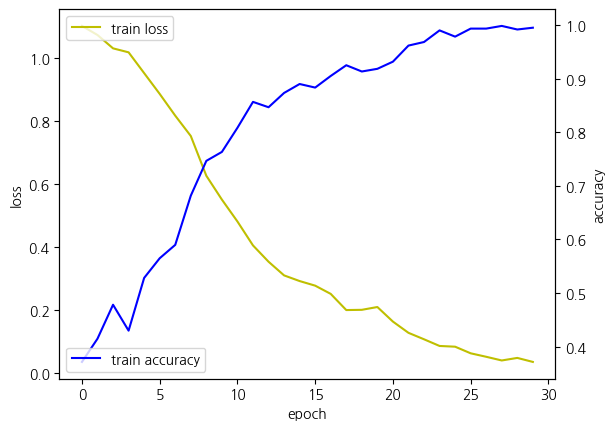

In [81]:

# 5. 모델 학습과정 표시하기
%matplotlib inline
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',family='NanumGothic')

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

#### 테스트 데이터 셋 로드

In [107]:
import numpy as np

def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "test1"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


#### test dataset을 통하여 test accuracy 확인

In [182]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.7352 - accuracy: 0.7300 - 232ms/epoch - 23ms/step
test_loss: 0.735244870185852
test_accuracy: 0.7300000190734863


## 회고

#####
- 직접 촬영한 이미지를 통해서 데이터 생성에서 시작하여 모델을 만들고 레이어를 구성하는 전체 흐름 이해할 수 있었음
- 훈련셋이 약 300개인 경우 정확도가 30프로를 안나오는 경우도 있었음
- 레이어를 추가하여 정확도가 많이 올라 갔으며 약 50 ~ 60프로 정도의 정확도를 보임
- 초기 입력되는 레이어의 채널을 많이 가져가지 않는부분이 좋다는 동료분의 얘기를 듣고 16,32 사이의 값으로 테스트하여 32일때 가장 좋은 정확도가 나옴
- Dense레이어에 입력되는 히든레이어에서 MaxPooling2D의 인자를 조정하였더니 테스트셋의 정확도가 많이 올라감을 확인
- MaxPooling2D의 인자와 테스트셋 정확도간 상관성에 대해 테스트를 하여 확인이 필요하다고 생각됨
- 검증셋을 추가하여 모델을 생성하는 경우 정확도는 검증셋이 없는 경우에 비해 절반의 정확도를 보임